In [17]:
#!pip install pytse_client

In [18]:
import pytse_client as tse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [19]:
#Download data from TSE Site
namad='اطلس'
data = tse.download(symbols=[namad],include_jdate= True,adjust = False) #adjust = True :قیمت تعدیل یافته سهم

In [20]:
df=data[namad]

In [21]:
#adding 26 empty row at end of dataframe
emptydf=pd.DataFrame(index=range(df.index.stop,df.index.stop+26))
df=df.append(emptydf)

In [22]:
df.tail(10)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate
1921,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
type(df),type(data)

(pandas.core.frame.DataFrame, dict)

In [24]:
df.describe()

,open,high,low,adjClose,value,volume,count,yesterday,close
count,1905.000000,1905.000000,1905.000000,1905.000000,1.905000e+03,1.905000e+03,1905.000000,1905.000000,1905.000000
mean,69062.871391,70211.698163,68005.147507,69194.364304,2.341034e+10,2.125901e+05,261.993701,69057.892388,69234.817848
std,88262.544113,89700.357010,86846.027178,88350.639835,5.542477e+10,7.317696e+05,506.054331,88239.708775,88377.465690
min,0.000000,8500.000000,0.000000,8395.000000,8.911000e+03,1.000000e+00,1.000000,8395.000000,8400.000000
25%,9882.000000,10000.000000,9760.000000,9850.000000,1.219234e+08,9.584000e+03,7.000000,9850.000000,9881.000000
50%,14725.000000,14825.000000,14700.000000,14800.000000,6.823380e+08,4.398200e+04,26.000000,14725.000000,14825.000000
75%,125000.000000,128900.000000,120151.000000,125997.000000,1.686948e+10,1.923850e+05,288.000000,125669.000000,126010.000000
max,285001.000000,288000.000000,279005.000000,281786.000000,6.886202e+11,2.016680e+07,4028.000000,281786.000000,281995.000000


In [25]:
#Tenkan-sen = (max-9-period high + min-9-period low) / 2
#, min_periods = 0
tenkan_max = df['high'].rolling(window = 9).max()
tenkan_min = df['low'].rolling(window = 9).min()
df['tenkan_sen'] = (tenkan_max + tenkan_min) / 2


In [26]:
#Kijun-sen = (max-26-period high + min-26-period low) / 2
kijun_max = df['high'].rolling(window = 26).max()
kijun_min = df['low'].rolling(window = 26).min()
df['kijun_sen'] = (kijun_max + kijun_min) / 2


In [27]:
#Senkou Span A = (Tenkan-sen + Kijun-sen) / 2
#(Kijun + Tenkan) / 2 Shifted ahead by 26 periods
df['senkou_a'] = ((df['kijun_sen'] + df['tenkan_sen']) / 2).shift(26)


In [28]:
#Senkou Span B = (max-52-period high + max-52-period low) / 2
#52 period High + Low / 2
senkou_b_max = df['high'].rolling(window = 52).max()
senkou_b_min = df['low'].rolling(window = 52).min()
df['senkou_b'] = ((senkou_b_max + senkou_b_min) / 2).shift(26)

In [29]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b
1901,2022-04-30,269920.0,275000.0,269631.0,270377.0,7.928842e+10,293251.0,684.0,270787.0,270800.0,1401-02-10,267508.5,253501.5,229777.75,230150.5
1902,2022-05-01,0.0,272750.0,0.0,272195.0,7.000255e+10,257178.0,600.0,270377.0,272690.0,1401-02-11,137500.0,137500.0,230625.25,229101.5
1903,2022-05-02,272700.0,272700.0,267001.0,270432.0,2.239890e+11,828265.0,844.0,272195.0,272000.0,1401-02-12,137500.0,137500.0,231003.25,228690.5
1904,2022-05-07,272110.0,274899.0,270035.0,273167.0,7.555636e+10,276594.0,721.0,270432.0,274899.0,1401-02-17,137500.0,137500.0,233416.25,228251.0
1905,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235316.25,228251.0
1906,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236566.25,229501.0
1907,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238816.25,231751.0
1908,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239699.25,232634.0
1909,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242611.00,235358.5
1910,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243203.75,235700.5


In [30]:
#Chikou Span = Close plotted 26 periods in the past
#Current close shifted -26
df['chikou'] = (df['close']).shift(-26)


In [31]:
df.tail(30)

,date,open,high,low,adjClose,value,volume,count,yesterday,close,jdate,tenkan_sen,kijun_sen,senkou_a,senkou_b,chikou
1901,2022-04-30,269920.0,275000.0,269631.0,270377.0,7.928842e+10,293251.0,684.0,270787.0,270800.0,1401-02-10,267508.5,253501.5,229777.75,230150.5,NaN
1902,2022-05-01,0.0,272750.0,0.0,272195.0,7.000255e+10,257178.0,600.0,270377.0,272690.0,1401-02-11,137500.0,137500.0,230625.25,229101.5,NaN
1903,2022-05-02,272700.0,272700.0,267001.0,270432.0,2.239890e+11,828265.0,844.0,272195.0,272000.0,1401-02-12,137500.0,137500.0,231003.25,228690.5,NaN
1904,2022-05-07,272110.0,274899.0,270035.0,273167.0,7.555636e+10,276594.0,721.0,270432.0,274899.0,1401-02-17,137500.0,137500.0,233416.25,228251.0,NaN
1905,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235316.25,228251.0,NaN
1906,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236566.25,229501.0,NaN
1907,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238816.25,231751.0,NaN
1908,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239699.25,232634.0,NaN
1909,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242611.00,235358.5,NaN
1910,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243203.75,235700.5,NaN


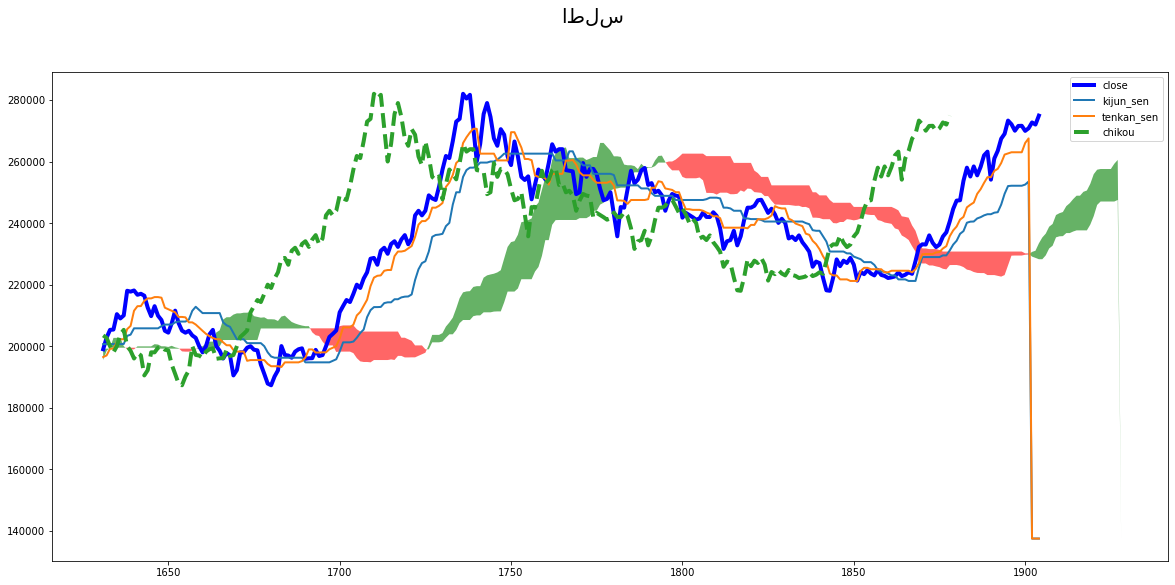

In [32]:
#Plotting Ichimoku
tmp = df[['close','kijun_sen','tenkan_sen','senkou_a','senkou_b','chikou']].tail(300)
fig,ax = plt.subplots(1,1,sharex=True,figsize = (20,9)) #share x axis and set a figure size
ax.plot(tmp['close'],label='close',linewidth=4,color='blue') # plot Close with index on x-axis with a line thickness of 4
ax.plot(tmp['kijun_sen'],label='kijun_sen',linewidth=2) # plot Close with index on x-axis with a line thickness of 4
ax.plot(tmp['tenkan_sen'],label='tenkan_sen',linewidth=2)
ax.plot(tmp['chikou'],label='chikou',linewidth=4,ls='--')
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b,where=tmp['senkou_b']> tmp['senkou_a'], facecolor='red',interpolate=True,alpha=.60)
ax.fill_between(tmp.index, tmp.senkou_a, tmp.senkou_b,where=tmp['senkou_b']< tmp['senkou_a'], facecolor='green',interpolate=True,alpha=.60)
fig.suptitle(namad, fontsize=20)
ax.legend()

In [33]:
tmp

,close,kijun_sen,tenkan_sen,senkou_a,senkou_b,chikou
1631,199000.0,200675.0,196475.0,199200.50,195500.0,203500.0
1632,202790.0,200675.0,196995.0,199200.50,198500.0,202700.0
1633,205301.0,200675.0,199185.0,199200.50,199500.5,199999.0
1634,205400.0,200675.0,199185.0,202700.25,199500.5,198000.0
1635,210400.0,200675.0,201250.5,202700.25,199500.5,200008.0
...,...,...,...,...,...,...
1926,NaN,NaN,NaN,259263.00,247001.0,NaN
1927,NaN,NaN,NaN,260505.00,247500.5,NaN
1928,NaN,NaN,NaN,137500.00,137500.0,NaN
1929,NaN,NaN,NaN,137500.00,137500.0,NaN
